<h1>Data</h1>
<h2>parameters</h2>
This module provide a set of random paramters alpha, beta, a and b. Parameters_size represent the number of problems that will be solved to generate the data.

In [1]:
from data import RandomParameters


parameters_size = 500
parameters = RandomParameters(
    parameters_size=parameters_size)

parameters 

      alpha      beta         a         b
0  0.248010  0.029719  1.995271  2.415532
1  0.508119  0.553593  0.016574  0.032488
2  0.809752  0.275097  2.226088  0.802748
3  0.180358  0.682068  2.030620  1.175965
4  0.310804  0.608642  2.186281  0.825844

<h2>data_generator</h2>
Generate the dataset from a sampled grid and the parameters. 

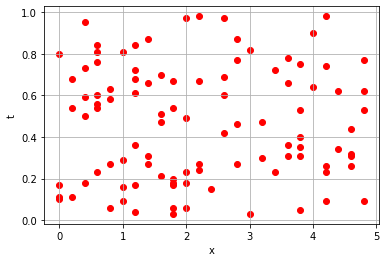

In [2]:
from direct_problem import Grid
from data import Coordinates

import matplotlib.pyplot as plt

grid = Grid(
    x_min=0,
    x_max=5,
    delta_x=0.2,
    t_max=1,
    delta_t=0.01
)

coordinates = Coordinates(grid)
sample_size = 100


x, t = grid.random_sample(size=sample_size)

def show_sample_size(x, t):
    plt.scatter(x, t, c='r')
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("t")

show_sample_size(x, t)

In [3]:
import numpy as np

from data import DataGenerator


f = lambda x: np.maximum(2-x, 0)

data_generator = DataGenerator(grid, parameters, solution_at_t_equal_zero=f)

# Provide raw solutions
raw_solution = data_generator.generate_data()


<h2>Illustration</h2>
Below, one can see an illustration of what an input of input data looks like. The blue surface is a solution ($u$), obtain by the solver an red crosses are show the values of the solutions on the grid.

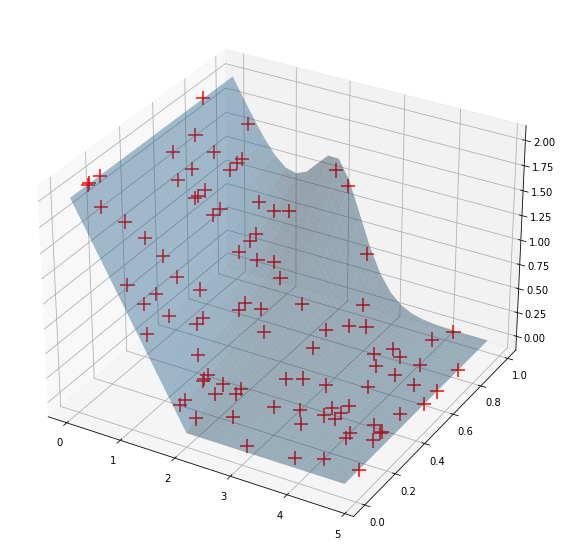

In [7]:
# Here is an illustration of what one item of input data looks like:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
T, X = np.meshgrid(x, t)
ax.scatter(x, t, raw_solution[0], c="r", marker="+", s=200, alpha=1)

# We solve the problem with set of parameters so we can see our data input
# next to the real solution
from direct_problem import ToyProblem, CSFTSolver
alpha, beta, a, b = parameters.parameters_array[0]
problem = ToyProblem(alpha, beta, a, b, f)
problem.set_grid(grid)
problem.init_boundaries()

solver = CSFTSolver(problem)
u = solver.solve()[0]

X, T = grid.meshed_grid()

ax.plot_surface(X, T, u, alpha=0.4)





For training purpose, we'll ask pytorch to provide this raw data as a dataloader

In [5]:
train_dl, test_dl = data_generator.dataloader(batch_size=50)